<a href="https://colab.research.google.com/github/joaoaxerb/Data-Science/blob/master/Estudo_de_caso_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do Covid-19 no Brasil e no Mundo.

Em 11 de março de 2020, a OMS(Organização Mundial de Saúde), decretou que a doença *COVID-19*, pode ser caracterizada como uma pandemia. A doença é causada pelo novo coronavírus *SARS-CoV-2* que rapidamente se disseminou por todo o planeta. O vírus foi primeiramente detectado na China, em dezembro de 2019, e logo em Janeiro de 2020 foi declarada uma Emergência de Saúde Pública Mundial, que futuramente progrediu para uma Pandemia. 

A pandemia de coronavírus começa a semana com tristes marcas, com mais de 10 milhões de casos e 500.000 mortes em todo o mundo, segundo balanço da Universidade Johns Hopkins. Nos Estados Unidos, país mais afetado, os dois maiores Estados voltaram atrás na reabertura em meio a novos casos de covid-19. Na China, um condado próximo de Pequim foi bloqueado após surtos. O Brasil ultrapassou a marca de 1,3 milhão de contágios e tem 57.622 óbitos.

<center><img alt="Colaboratory logo" width="50%" src="https://github.com/joaoaxerb/Data-Science/blob/05bbada6477483b4a877b47283be2c1a85a4df35/images.png?raw=true
"></center>




## Contextualização

O objetivo desta análise é visualizar de forma interativa e numérica, quais foram o impacto do *COVID-19* no Mundo e, como a curva epidemiológica do Brasil se compara com o resto do Mundo.

## Obtenção de dados

Os dados utilizados neste análise foram obtidos através do portal de dados abertos do [Our World in Data](https://ourworldindata.org/), que é uma orgnização mundial que conta com cientistas do mundo inteiro, que trabalham para divulgar e tentar resolver os maiores problemas enfrentados pela humanidade como, fome, doenças, pobreza e aquecimento global.

O `Dataset` foi atualizado no dia 29 de junho de 2020 e contém informações sobre o Coronavírus em diversos países do mundo.



## Dicionário de Variáveis

* `iso_code` - *Código do País contendo 3 letras*
* `continent` - *Continente*
* `location` - *Localização Geográfica*
* `date` - *Data da observação*
* `total_cases` - *Número total de casos confirmados*
* `new_cases` - *Número total de novos casos*
* `total_deaths` - *Número total de mortes*
* `new_deaths` - *Número total de novas mortes*
* `total_cases_per_million` - *Número total de casos por 1 milhão de pessoas*
* `new_cases_per_million` - *Número total de novos casos por 1 milhão de pessoas*
* `total_deaths_per_million` - *Número total de mortes por 1 milhçao de pessoas*
* `new_deaths_per_million` - *Número total de novas mortes por 1 milhão de pessoas*
* `total_tests` - *Número total de testes*
* `new_tests` - *Número total de novos testes*
* `new_tests_smoothed` - *Novos testes considerando a média móvel de sete dias*
* `total_tests_per_thousand` - *Número total de testes por 1000 pessoas*
* `new_tests_per_thousand` - *Número total de novos testes por 1000 pessoas*
* `new_tests_smoothed_per_thousand` - *Novos testes considerando a média móvel de sete dias*
* `tests_units` - *Unidade utilizada pelos países para reportar os testes* 
* `stringency_index` - *Índice de isolamento social*
* `population` - *População do País em 2020*
* `population_density` - *Densidade Geográfica*
* `median_age` - *Mediana da idade*
* `aged_65_older` - *Pessoas com 65 ou mais anos de idade* 
* `aged_70_older` - *Pessoas com 70 ou mais anos de idade*
* `gdp_per_capita` - *PIB per capita*
* `extreme_poverty` - *Porção da população que vive em pobreza extrema*
* `cvd_death_rate` - *Taxa de mortalidade por doenças cardiovasculares em 2017*
* `diabetes_prevalence` - *Prevalência de diabetes* 
* `female_smokers` - *Fumantes do sexo feminino*
* `male_smokers` - *Fumantes do sexo masculino* 
* `handwashing_facilities` - *Locais de higienização* 
* `hospital_beds_per_thousand` - *Leitos de hospital por milhão de habitantes*
* `life_expectancy` - *Expectativa de vida da população*

## Importando os dados do COVID-19

In [10]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# importar o dataset COVID-19 para um DataFrame
DATA_PATH = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(DATA_PATH)

## Análise Exploratória dos Dados

A primeira etapa será uma análise exploratória inicial do *Dataset*. Iremos observar o formato dos dados, tipos de variáveis, dimensões da tabela para que possamos nos familiarizar com as informações.

Primeiramente, vamos ver as 5 primeiras entradas do nosso *Dataset*.


In [ ]:
# Ver as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Agora vamos obter as dimensões do nosso *Datset*.

In [ ]:
# Dimensões do Dataset
print("Dimensões do Dataset:\n"
      "Linhas:{}\n".format(df.shape[0]),
      "Colunas:{}".format(df.shape[1]))

Dimensões do Dataset:
Linhas:27169
 Colunas:34


Agora vamos imprimir os nomes das colunas, que sao as variáveis do nosso *Dataset*

In [ ]:
# Imprimir nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Vamos observar quais são os tipos de variáveis que temos no nosso *Dataset*.

In [ ]:
# Tipos das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Agora vamos identificar a porcentagem de valores ausentes por coluna do *Dataset*.


In [23]:
# Identificar % de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.721892
new_tests_per_thousand             0.721892
total_tests_per_thousand           0.706042
total_tests                        0.706042
new_tests_smoothed_per_thousand    0.684778
new_tests_smoothed                 0.684778
tests_units                        0.662496
handwashing_facilities             0.590623
extreme_poverty                    0.404140
male_smokers                       0.287140
female_smokers                     0.278705
stringency_index                   0.201877
hospital_beds_per_thousand         0.175939
aged_65_older                      0.110920
gdp_per_capita                     0.108460
aged_70_older                      0.102696
median_age                         0.098056
cvd_death_rate                     0.097002
diabetes_prevalence                0.067480
population_density                 0.044038
life_expectancy                    0.013953
new_deaths_per_million             0.010122
total_deaths_per_million        

As colunas `new_tests` e `new_tests_per_thousand` sao as que apresentam porcentagem mais alta de valores ausentes, com **74%**.

Vamos alterar o tipo da coluna `date` de objeto para data, para que fique mais manipulável.

In [11]:
# Alterando tipo da coluna date
df.date = pd.to_datetime(df.date)

Vamos idintificar,  para a data mais atual, quais paises tem mais casos e mortes.

In [16]:
# Para a data atual vamos ver qual país tem mais casos.
df.loc[df.date == '2020-07-05',['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

,location,total_cases
27073,United States,2839542.0
3851,Brazil,1577004.0
21471,Russia,674515.0
12035,India,673165.0
20372,Peru,299080.0


In [15]:
# Para a data atual vamos ver qual país tem mais mortes.
df.loc[df.date == '2020-07-05', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False,)[1:6]

,location,total_deaths
27073,United States,129676.0
3851,Brazil,64265.0
26884,United Kingdom,44198.0
13266,Italy,34854.0
16950,Mexico,30366.0


**Estados Unidos da América** e **Brasil** lideram em total de casos e mortes na data mais atual do *Dataset*, *29-06-2020*.

Vamos plotar um gráfico para os cinco países com maior número de casos até a data atual.

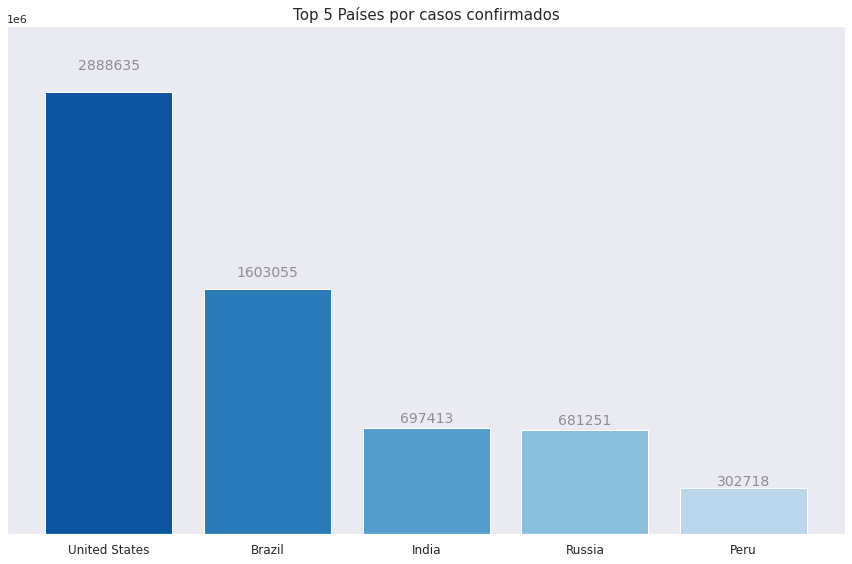

In [59]:
# Coletando dados para o gráfico
top5_cases = df.loc[df.date == '2020-07-06', ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:6]

# Definindo Estilo
sns.set_style('dark')
palette = 'Blues_r'


# Plotando grafico
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim(0, top5_cases.iloc[0, 1] * 1.15)
rects = ax.bar('location', 'total_cases',data=top5_cases, color=sns.color_palette(palette))

# Labels
top5 = list(top5_deaths.iloc[:5,1])
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True)
plt.xticks(fontsize=12)
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True)

for rect, case in zip(rects, top5):
    height = rect.get_height()
    ax.text(x=rect.get_x() + rect.get_width() / 2, y=height * 1.05, s=f'{int(height)}', ha='center', color='black', fontsize=14, alpha=0.4)

plt.title("Top 5 Países por casos confirmados", fontsize=15)
plt.tight_layout()

Vamos plotar um gráfico de barras para os cinco países com mais mortes até a data atual.

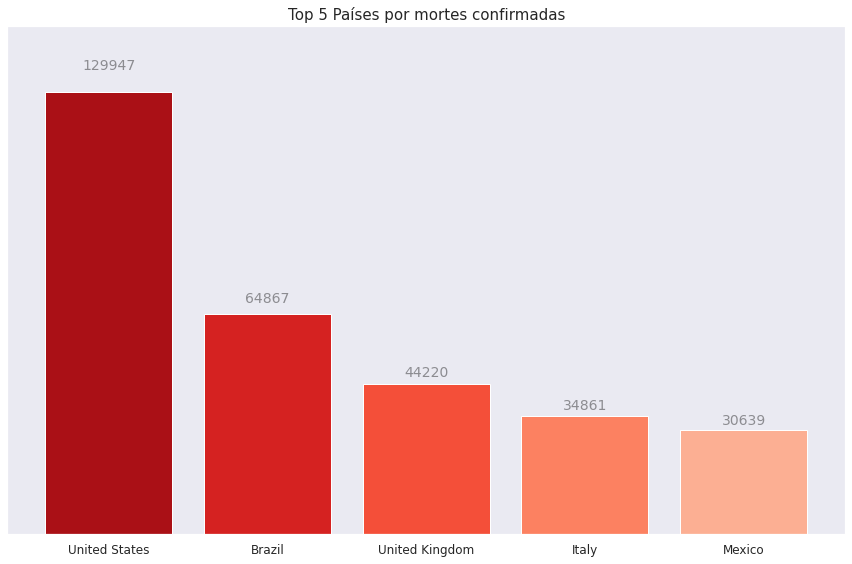

In [61]:
# Coletando dados para o gráfico
top5_deaths = df.loc[df.date == '2020-07-06',['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

# Definindo Estilo
sns.set_style('dark')
palette = 'Reds_r'


# Plotando grafico
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim(0, top5_deaths.iloc[0, 1] * 1.15)
rects = ax.bar('location', 'total_deaths',data=top5_deaths, color=sns.color_palette(palette))

# Labels
top5 = list(top5_deaths.iloc[:5,1])
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=True)
plt.xticks(fontsize=12)

for rect, case in zip(rects, top5):
    height = rect.get_height()
    ax.text(x=rect.get_x() + rect.get_width() / 2, y=height * 1.05, s=f'{int(height)}', ha='center', color='black', fontsize=14, alpha=0.4)

plt.title("Top 5 Países por mortes confirmadas", fontsize=15)
plt.tight_layout()

Agora vamos plotar um gráfico de linha, para visualizarmos a evolução dos casos de COVID-19 no mundo.

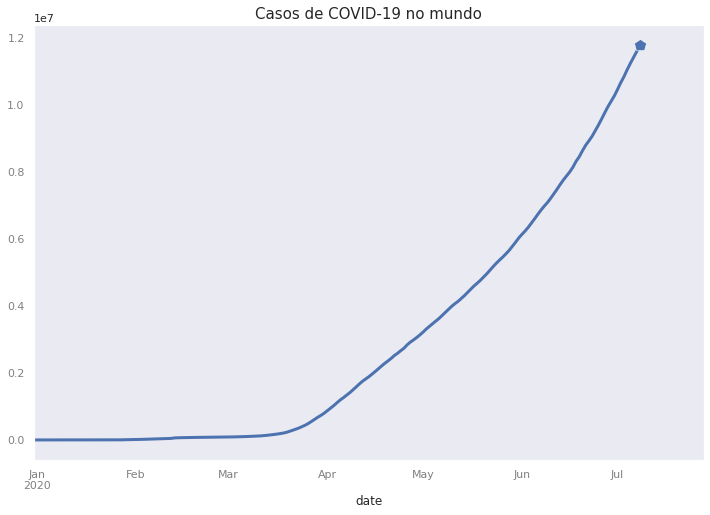

In [13]:
# Coletar dados para o gráfico
df_casos_mundo = df.loc[df.location == 'World',['location', 'date', 'total_cases']].reset_index(drop=True)


# Plotar Gráfico
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
marker ='p'
df_casos_mundo.plot('date', 'total_cases', kind='line',ax=ax, grid=False, legend=False, linewidth=3, marker=marker, markersize=12, markeredgecolor='w', markeredgewidth=0.5, markevery=[-1]);

limx = df_casos_mundo.iloc[-1, 1] + dt.timedelta(days=20)
ax.set_xlim(df.iloc[0, 3], limx)

plt.title("Casos de COVID-19 no mundo", fontsize=15)
plt.xticks(color="gray")
plt.yticks(color="gray")

plt.show()

Agora vamos plotar o Gráfico de mortes por COVID-19 no mundo

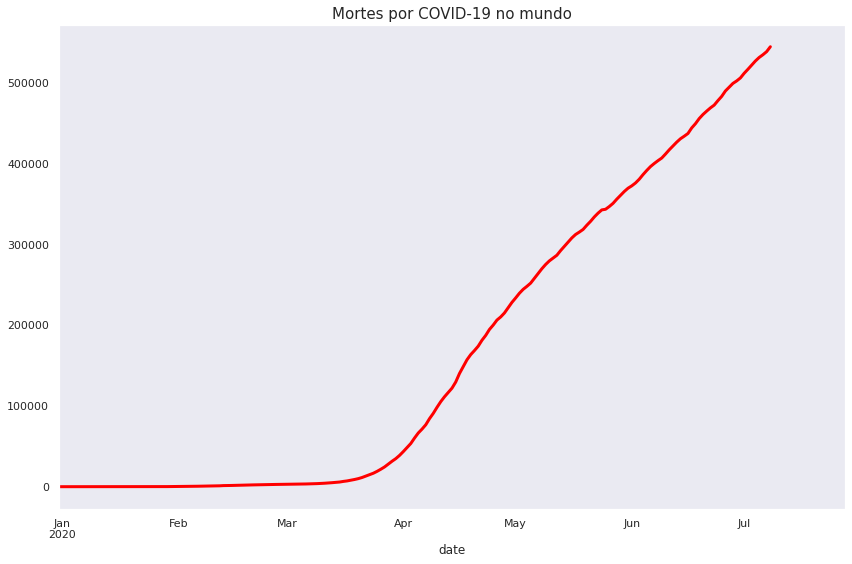

In [14]:
# Coletando dados para o gráfico
df_mortes = df.loc[df.location == 'World', ['date', 'location', 'total_deaths']].reset_index(drop=True)
df_mortes.set_index(df_mortes.date, inplace=True)

# Plotar gráfico
sns.set()
fig, ax = plt.subplots(figsize=(12,8))
df_mortes.plot('date', 'total_deaths', kind='line', ax=ax, grid=False, legend=False, color='red', linewidth=3)

limx = df_casos_mundo.iloc[-1, 1] + dt.timedelta(days=20)
ax.set_xlim(df.iloc[0, 3], limx)

plt.title("Mortes por COVID-19 no mundo", fontsize=15)
plt.tight_layout()

## COVID-19  no Brasil
Agora vamos analisar os dados referente ao Brasil.

In [3]:
# Criar um nov DataFrame apenas com infos sobre o Brasil
df_br = df.loc[df.location == 'Brazil'].copy()

Vamos indentificar quando foi registrado o primeiro caso de COVID-19 no Brasil.


In [19]:
# Primeiro caso de COVID-19 registrado no Brasil
df_br.loc[df.total_cases == 1, ['date', 'location', 'total_cases']]

,date,location,total_cases
3613,2020-02-26,Brazil,1.0
3614,2020-02-27,Brazil,1.0
3615,2020-02-28,Brazil,1.0
3616,2020-02-29,Brazil,1.0


O primeiro caso de COVID-19 no Brasil foi registrado no dia **26 de Fevereiro de 2020**

Vamos identificar quando foi reportada a primeira morte no Brasil por COVID-19.

In [17]:
# Primeira morte no Brasil por Covid-19
df_br.loc[df_br.total_deaths == 1, ['date', 'location', 'total_deaths']]

,date,location,total_deaths
3634,2020-03-18,Brazil,1.0


A primeira morte no Brasil por COVID-19 foi reportada no dia **18/03/2020**.

Agora vamos plotar um grafico para representar visualmente quanto tempo se passou entre o primeiro caso reportado e a primeira morte reportada.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


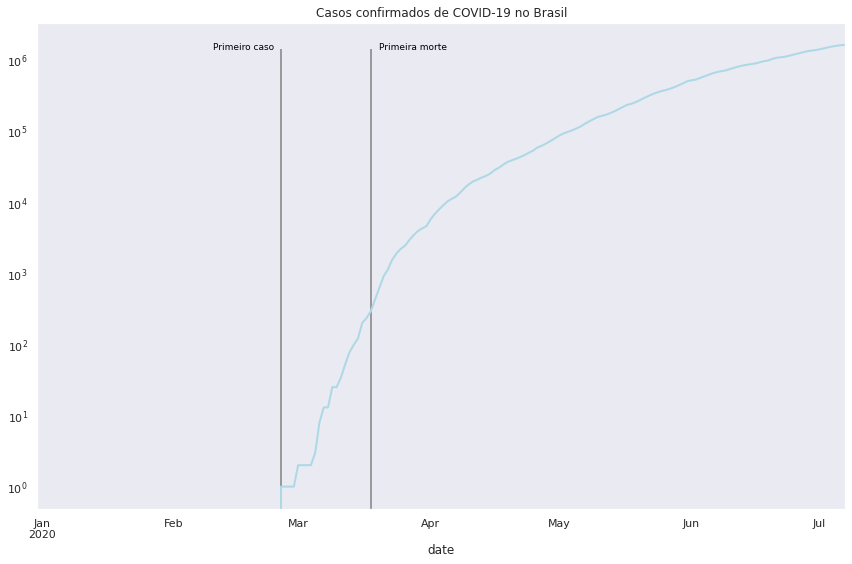

In [64]:
# Plotar Gráfico
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("dark")

font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 9,
        }

df_br.plot('date', 'total_cases', ax=ax, legend=False, color="lightblue",linewidth=2, logy=True)
plt.vlines(x='2020-02-26',ymin=0,ymax=1400000, color="gray")
plt.vlines(x='2020-03-18',ymin=0,ymax=1400000, color="gray")
plt.text(x='2020-02-10', y=1380000, s="Primeiro caso", fontdict=font)
plt.text(x='2020-03-20', y=1380000, s="Primeira morte", fontdict=font)
plt.title("Casos confirmados de COVID-19 no Brasil")
plt.tight_layout()

A primeira morte no Brasil foi reportada **23** dias após o primeiro caso ser confirmado.

Agora vamos plotar os gráficos em escala linear e logarítimica para os casos totais e mortes totais no Brasil.

Primeiro vamos aos casos totais.


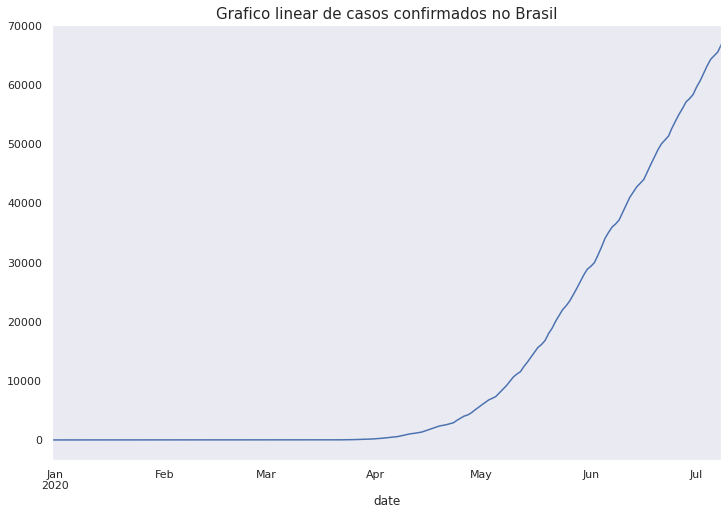

In [17]:
# plotando gráficos
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')

# Grafico linear
df_br.plot('date', 'total_deaths',kind='line',ax=ax, legend=False )
ax.set_title("Grafico linear de casos confirmados no Brasil", fontsize=15)

plt.show()

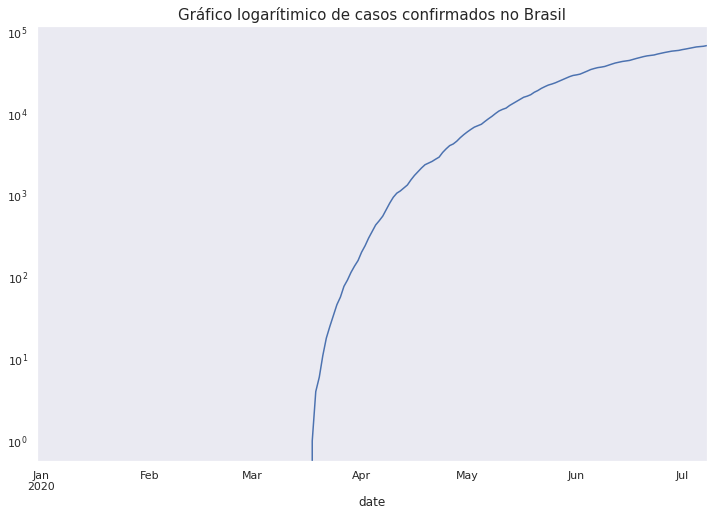

In [20]:
# Gráfico logarítimico
fig,ax = plt.subplots(figsize=(12,8))
df_br.plot('date', 'total_deaths',kind='line',ax=ax, logy=True, legend=False)
ax.set_yscale('log')
ax.set_title("Gráfico logarítimico de casos confirmados no Brasil", fontsize=15)

plt.show()

Agora vamos plotar o gráfico linear e logaritmico para mortes totais no Brasil.

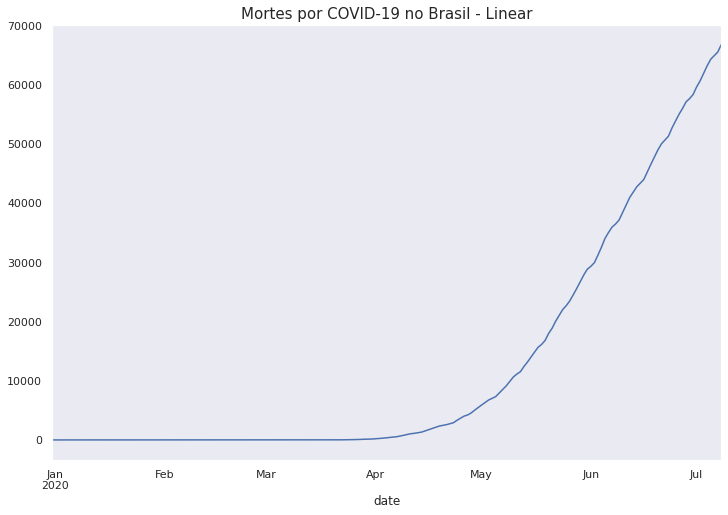

In [21]:
# plotar gráfico
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')

# Gráfico em escala linear
df_br.plot('date', 'total_deaths', kind='line', ax=ax, legend=False)
ax.set_title("Mortes por COVID-19 no Brasil - Linear", fontsize=15)

plt.show()


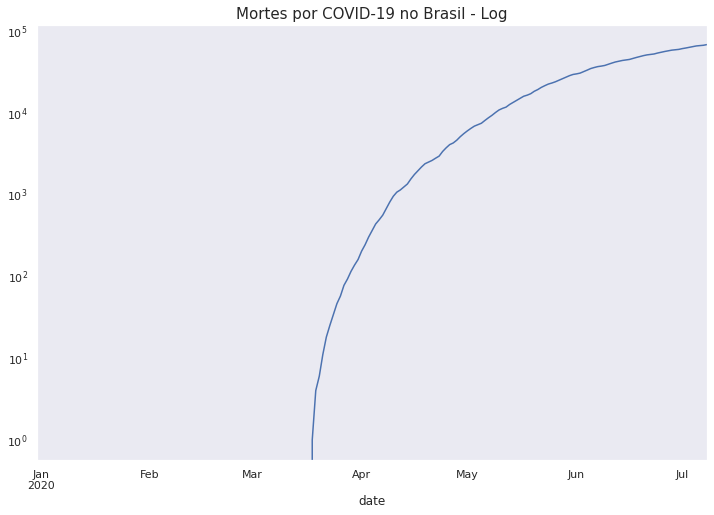

In [23]:
# Gráfico em escala logarítimica
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')
df_br.plot('date', 'total_deaths', kind='line', ax=ax, logy=True, legend=False)
ax.set_title("Mortes por COVID-19 no Brasil - Log", fontsize=15)
ax.set_yscale('log')

plt.show()

## Comparação Brasil x Mundo

* Como as medidas tomadas pelo governo Brasileiro se compara com as do resto do mundo? 

* O grande número de mortes poderia ter sido evitado, ou o Brasil por ser um país populoso e emergente ia sofrer com a grande quantidade de óbitos independentemente de quais medidas e de quão rápido elas fossem implementadas?

Primeiramente, vamos comparar o numero de casos e mortes por milhão de habitantes no Brasil com os números de outros países.

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


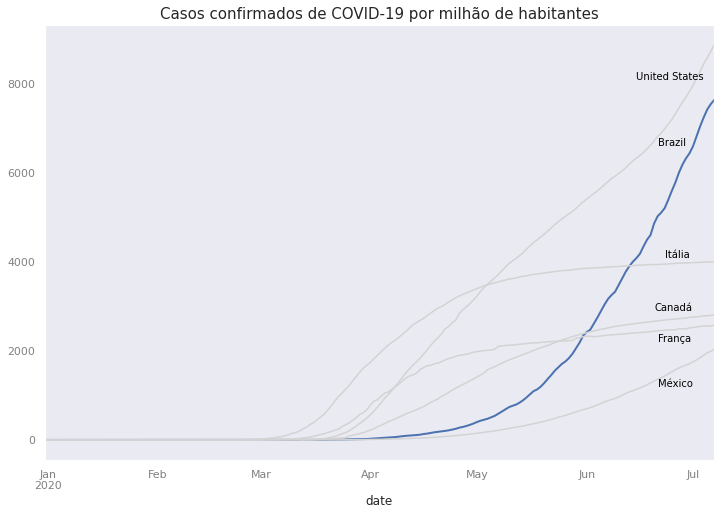

In [65]:
# Plotar gráfico
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')
font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 10}

df.loc[df.location == 'Brazil'].plot('date', 'total_cases_per_million', kind='line', ax=ax, linewidth=2, legend=False)
df.loc[df.location == 'Canada'].plot('date', 'total_cases_per_million', kind='line', ax=ax, color="lightgray", legend=False)
df.loc[df.location == 'Italy'].plot('date', 'total_cases_per_million', kind='line', ax=ax, color="lightgray", legend=False)
df.loc[df.location == 'France'].plot('date', 'total_cases_per_million', kind='line', ax=ax, color="lightgray", legend=False)
df.loc[df.location == 'Mexico'].plot('date', 'total_cases_per_million', kind='line', ax=ax, color="lightgray", legend=False)
df.loc[df.location == 'United States'].plot('date', 'total_cases_per_million', kind='line', ax=ax, color="lightgray", legend=False)

plt.text(x='2020-06-23', y=4100, s='Itália', fontdict=font)
plt.text(x='2020-06-20', y=2900, s='Canadá', fontdict=font)
plt.text(x='2020-06-21', y=2200, s='França', fontdict=font)
plt.text(x='2020-06-21', y=1200, s='México', fontdict=font)
plt.text(x='2020-06-21', y=6600, s='Brazil', fontdict=font)
plt.text(x='2020-06-15', y=8100, s='United States', fontdict=font)

plt.title("Casos confirmados de COVID-19 por milhão de habitantes", fontsize=15)
plt.xticks(color="gray")
plt.yticks(color="gray")

plt.show()


Agora vamos plotar o mesmo gráfico para o número de mortes por 1 milhão de habitantes.

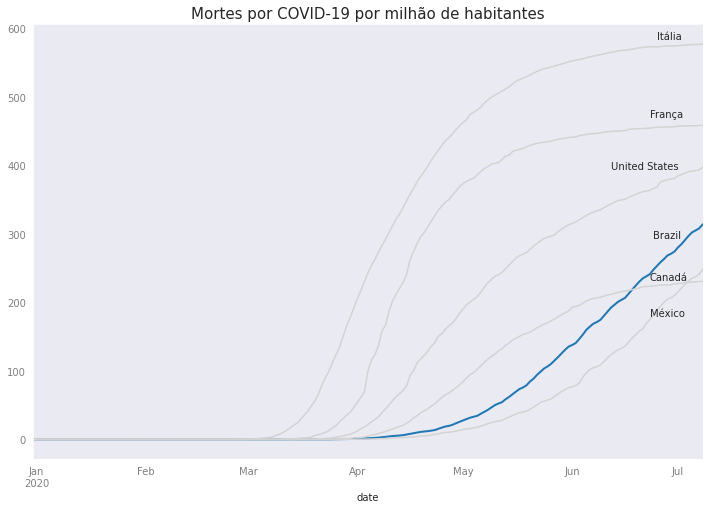

In [5]:
# Plotar gráfico p/ número de mortes
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('dark')

df.loc[df.location == 'Brazil'].plot('date', 'total_deaths_per_million', kind='line', ax=ax, linewidth=2, legend=False)
df.loc[df.location == 'Canada'].plot('date', 'total_deaths_per_million', kind='line', ax=ax, legend=False, color='lightgray')
df.loc[df.location == 'Italy'].plot('date', 'total_deaths_per_million', kind='line', ax=ax, legend=False,color='lightgray')
df.loc[df.location == 'France'].plot('date', 'total_deaths_per_million', kind='line', ax=ax, legend=False, color='lightgray')
df.loc[df.location == 'Mexico'].plot('date', 'total_deaths_per_million', kind='line', ax=ax, legend=False, color='lightgray')
df.loc[df.location == 'United States'].plot('date', 'total_deaths_per_million', kind='line', ax=ax, legend=False, color='lightgray')

ax.text(x='2020-06-24', y=294, s="Brazil", fontsize=10)
ax.text(x='2020-06-23', y=233, s="Canadá", fontsize=10)
ax.text(x='2020-06-25', y=584, s="Itália", fontsize=10)
ax.text(x='2020-06-23', y=470, s="França", fontsize=10)
ax.text(x='2020-06-23', y=180, s="México", fontsize=10)
ax.text(x='2020-06-12', y=395, s="United States", fontsize=10)

plt.title("Mortes por COVID-19 por milhão de habitantes", fontsize=15)


plt.xticks(color="gray")
plt.yticks(color="gray")

plt.show()

Analisando o grafico acima, temos uma sensação de que as o Brasil não está tão mal assim, afinal, proporcionalmente, temos menos mortes que muitos países, então não precisamos nos preocupar, certo?

**Errado!** O site [Worldometer](https://www.worldometers.info/coronavirus/), da Universidade de Oxford, no Reino Unido, o qual utiliza uma base da dados confiada por diversos países e instituições renomadas como The New York Times, BBC, John Hopkins CSSE, Financial Times, aponta que o Brasil é um dos países que menos testa para COVID-19.

Isso significa que, atualmente, a proporção de testes por cada 1 mil habitantes no Brasil, considerando uma população de 210 milhões de pessoas, é de 0,63 (ou 63 por cada 100 mil habitantes).

Essa taxa é inferior à de muitos países do mundo, inclusive latino-americanos, como Cuba (2,65), Chile (6,43), Paraguai (0,83), Peru (4,44), Argentina (0,76) e Equador (1,15).

Também é muito mais baixa do que a de nações desenvolvidas, como Alemanha (25,11) e Itália (23,64), e dos Estados Unidos (12,08).

Vamo agora analisar como o Brasil respondeu as medidas tomadas pelo Governo, em relação a número de casos e mortes.

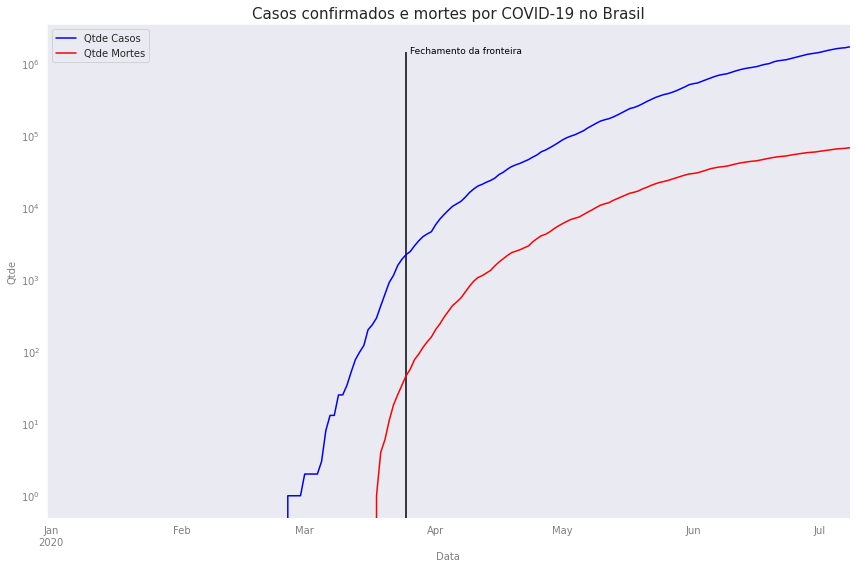

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("dark")

font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 9,
        }

df_br.plot('date', 'total_cases', ax=ax, label="Qtde Casos", color="blue", logy=True)
df_br.plot('date', 'total_deaths', ax=ax, label="Qtde Mortes", color="red",logy=True)

plt.vlines(x='2020-03-25',ymin=0,ymax=1400000, color="black")

plt.text(x='2020-03-26', y=1380000, s="Fechamento da fronteira", fontdict=font)

plt.xlabel("Data", color="gray")
plt.ylabel("Qtde", color="gray")
plt.xticks(color="gray")
plt.yticks(color="gray")

plt.title("Casos confirmados e mortes por COVID-19 no Brasil", fontsize=15)
plt.tight_layout()



Vamos agora criar uma coluna no nosso Dataset, na qual irei calcular a taxa de mortalidade do *COVID-19*.

In [9]:
# Coletando dados
df_mort = df.loc[df.date == '2020-07-06', ['location', 'total_cases', 'total_deaths']].reset_index(drop=True)

# Criando coluna
df_mort['mortality_rate'] = df_mort['total_deaths'] / df_mort['total_cases']

# Visualizando nova tabela
df_mort.sort_values(by='mortality_rate', ascending = False).reset_index(drop=True)[1:11]

,location,total_cases,total_deaths,mortality_rate
1,Sint Maarten (Dutch part),78.0,15.0,0.192308
2,France,166960.0,29893.0,0.179043
3,Belgium,62016.0,9771.0,0.157556
4,United Kingdom,285416.0,44220.0,0.154932
5,Italy,241611.0,34861.0,0.144286
6,Hungary,4183.0,589.0,0.140808
7,British Virgin Islands,8.0,1.0,0.125000
8,Netherlands,50566.0,6118.0,0.120990
9,Mexico,256848.0,30639.0,0.119288
10,Spain,251789.0,28388.0,0.112745


Vamos agora encontrar a taxa de mortalidade do *COVID-19* no Brasil.

In [43]:
# Encontrando Brasil
df_mort.loc[df_mort.location == 'Brazil']

,location,total_cases,total_deaths,mortality_rate
27,Brazil,1603055.0,64867.0,0.040465


Irei agora encontrar a média de mortalidade d *COVID-19* no Mundo.

In [36]:
# Encontrando a média 
df_mort.mortality_rate.mean()

0.03268371709893542